In [1]:
pip install ucimlrepo

Metadata:
 {'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their App

<ipython-input-2-ec3e30c5c614>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='muted')


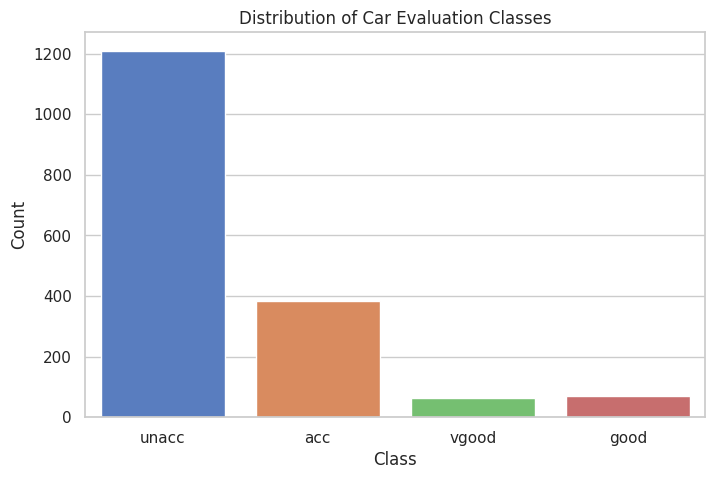

<ipython-input-2-ec3e30c5c614>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='pastel', order=data[feature].value_counts().index)
<ipython-input-2-ec3e30c5c614>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='pastel', order=data[feature].value_counts().index)
<ipython-input-2-ec3e30c5c614>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='pastel', order=data[feature].value_counts().index)
<ipython-input-2-ec3e30c5c614>:41: FutureWarning: 



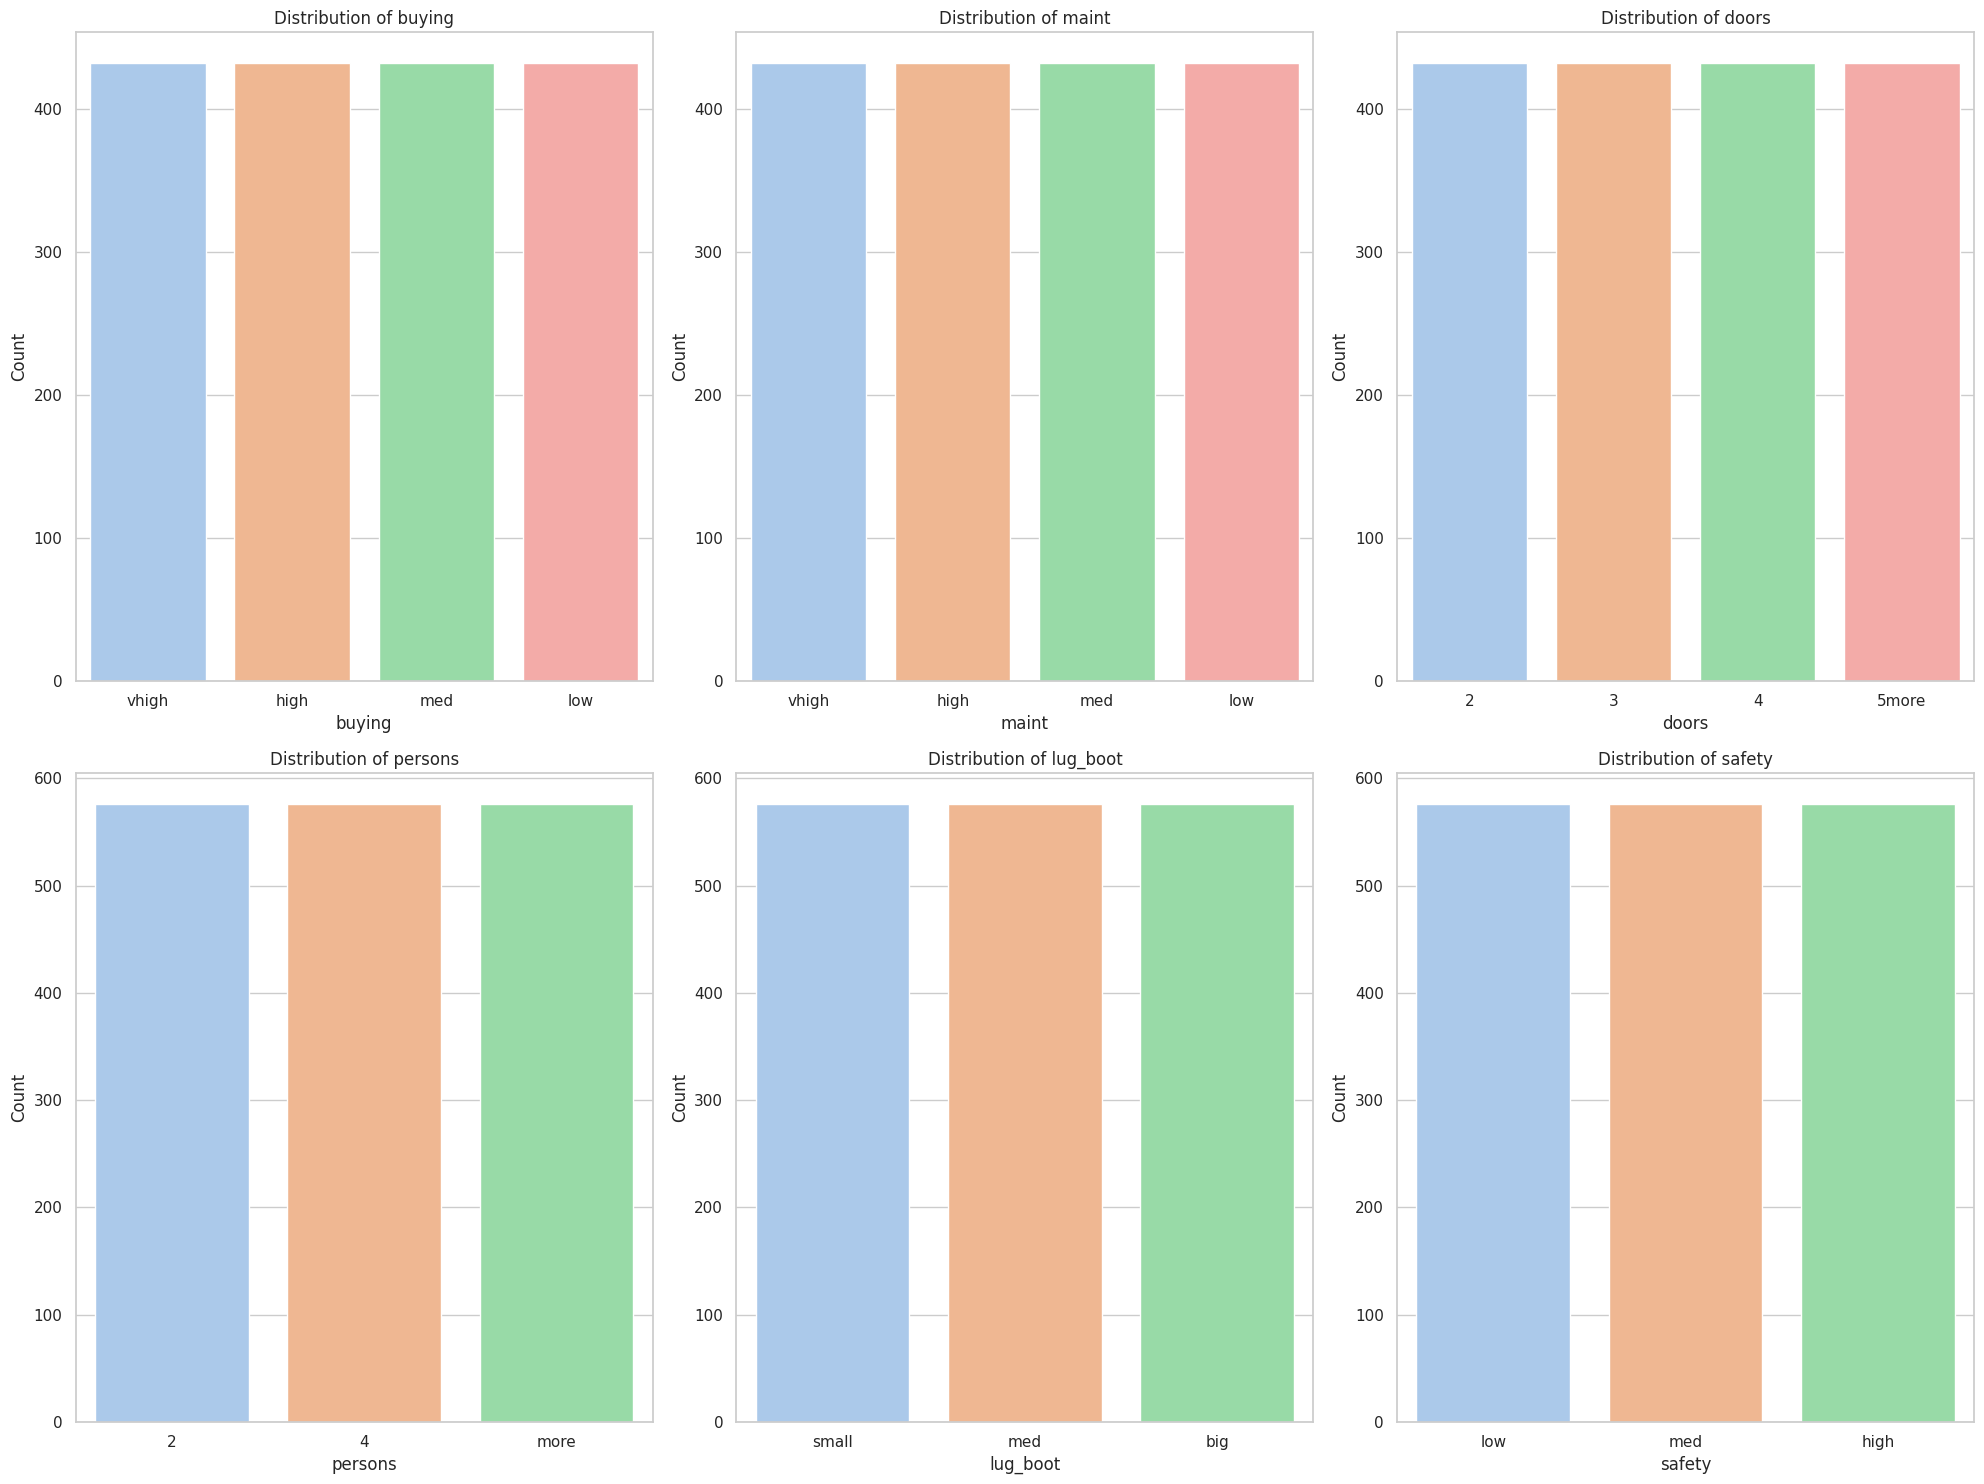

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# Load data and target
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Combine features and target into one DataFrame for convenience
data = pd.concat([X, y], axis=1)

# Display metadata and variable information
print("Metadata:\n", car_evaluation.metadata)
print("\nVariable Information:\n", car_evaluation.variables)

# Preview dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

# EDA and visualization
# Set up visualization style
sns.set(style="whitegrid")

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='class', palette='muted')
plt.title('Distribution of Car Evaluation Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of categorical features
features = X.columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, palette='pastel', order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}

Classification Report:

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85        83
        good       0.59      0.91      0.71        11
       unacc       0.97      0.97      0.97       235
       vgood       0.89      0.94      0.91        17

    accuracy                           0.93       346
   macro avg       0.83      0.91      0.86       346
weighted avg       0.93      0.93      0.93       346



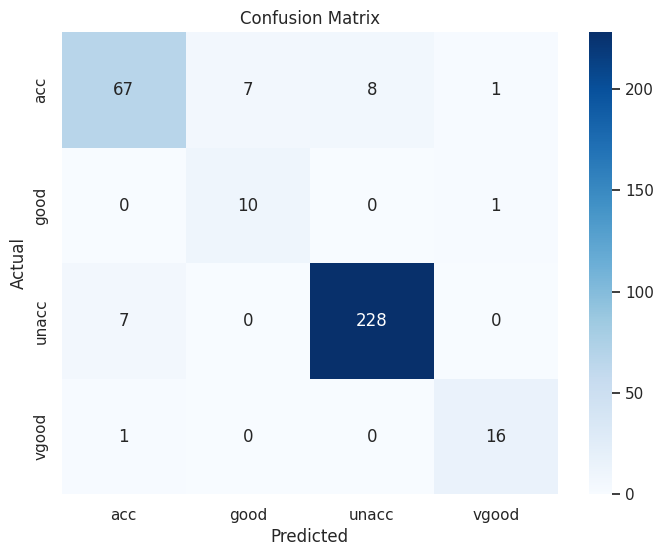

In [3]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mengimpor dataset dari ucimlrepo
from ucimlrepo import fetch_ucirepo

car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# 2. Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Menentukan preprocessing untuk kolom numerik dan kategorik
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# 4. Membuat pipeline Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))])

# 5. Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# 6. Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 7. Menampilkan hasil hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# 8. Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 10. Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.squeeze().unique()),
            yticklabels=sorted(y_test.squeeze().unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Classification Report:

              precision    recall  f1-score   support

         acc       0.97      0.86      0.91        83
        good       0.59      0.91      0.71        11
       unacc       0.98      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.95       346
   macro avg       0.84      0.90      0.86       346
weighted avg       0.96      0.95      0.95       346



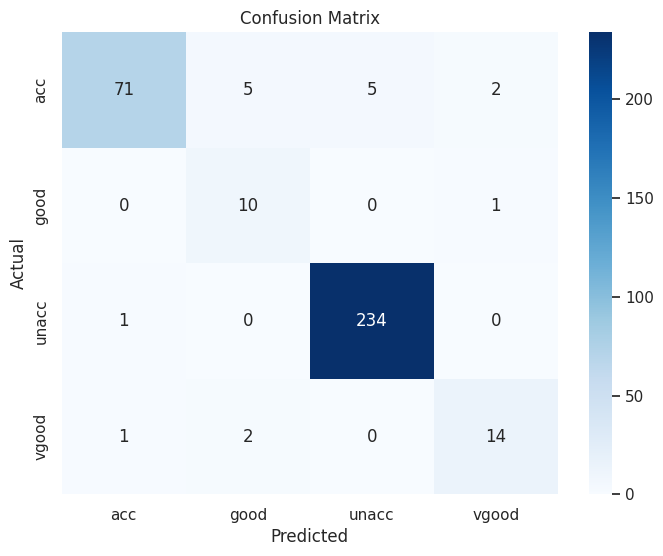

In [4]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mengimpor dataset dari ucimlrepo
from ucimlrepo import fetch_ucirepo

# Mengambil dataset Car Evaluation
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features  # Data fitur
y = car_evaluation.data.targets   # Data target

# 2. Membagi data menjadi training (latih) dan testing (uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Menentukan preprocessing untuk kolom numerik dan kategorik
# Identifikasi kolom numerik dan kategorik
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing untuk data kategorik
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Menggabungkan preprocessing ke dalam satu transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Untuk kolom numerik
        ('cat', categorical_transformer, categorical_features)])  # Untuk kolom kategorik

# 4. Membuat pipeline untuk Decision Tree Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing data
    ('classifier', DecisionTreeClassifier(random_state=42))])  # Model Decision Tree

# 5. Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],  # Kedalaman maksimal
    'classifier__min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'classifier__min_samples_leaf': [1, 2, 4],  # Jumlah minimum sampel pada daun
    'classifier__criterion': ['gini', 'entropy']  # Kriteria pemisahan
}

# 6. Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 7. Menampilkan hasil hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# 8. Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 10. Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.squeeze().unique()),
            yticklabels=sorted(y_test.squeeze().unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyt

Best Hyperparameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}

Classification Report:

              precision    recall  f1-score   support

         acc       0.80      0.86      0.83        83
        good       0.36      0.36      0.36        11
       unacc       0.96      0.99      0.98       235
       vgood       1.00      0.24      0.38        17

    accuracy                           0.90       346
   macro avg       0.78      0.61      0.64       346
weighted avg       0.91      0.90      0.89       346



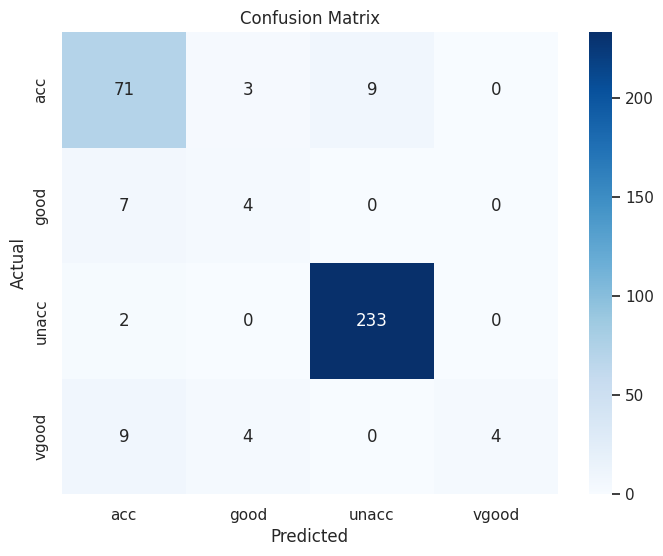

In [5]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mengimpor dataset dari ucimlrepo
from ucimlrepo import fetch_ucirepo

# Mengambil dataset Car Evaluation
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features  # Data fitur
y = car_evaluation.data.targets   # Data target

# 2. Membagi data menjadi training (latih) dan testing (uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Menentukan preprocessing untuk kolom numerik dan kategorik
# Identifikasi kolom numerik dan kategorik
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing untuk data kategorik
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Menggabungkan preprocessing ke dalam satu transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Untuk kolom numerik
        ('cat', categorical_transformer, categorical_features)])  # Untuk kolom kategorik

# 4. Membuat pipeline untuk KNeighborsClassifier (k-NN)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing data
    ('classifier', KNeighborsClassifier())])  # Model KNeighborsClassifier

# 5. Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga terdekat
    'classifier__weights': ['uniform', 'distance'],  # Bobot yang digunakan (uniform atau distance)
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev'],  # Jarak yang digunakan untuk mencari tetangga
}

# 6. Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 7. Menampilkan hasil hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# 8. Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 10. Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.squeeze().unique()),
            yticklabels=sorted(y_test.squeeze().unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        83
           1       0.61      1.00      0.76        11
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00        17

    accuracy                           0.98       346
   macro avg       0.90      0.98      0.93       346
weighted avg       0.99      0.98      0.98       346



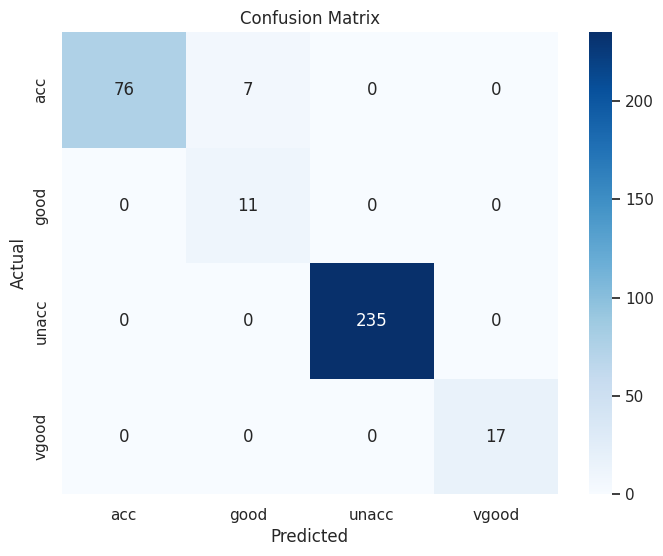

In [7]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Mengimpor dataset dari ucimlrepo
from ucimlrepo import fetch_ucirepo

# Mengambil dataset Car Evaluation
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features  # Data fitur
y = car_evaluation.data.targets   # Data target

# 2. Mengonversi kelas target dari string ke label numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Mengonversi kelas menjadi numerik

# 3. Membagi data menjadi training (latih) dan testing (uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Menentukan preprocessing untuk kolom numerik dan kategorik
# Identifikasi kolom numerik dan kategorik
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing untuk data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing untuk data kategorik
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Menggabungkan preprocessing ke dalam satu transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Untuk kolom numerik
        ('cat', categorical_transformer, categorical_features)])  # Untuk kolom kategorik

# 5. Membuat pipeline untuk XGBClassifier (XGBoost)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing data
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))])  # Model XGBoost

# 6. Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Jumlah pohon keputusan
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'classifier__max_depth': [3, 6, 10],  # Kedalaman maksimum setiap pohon
    'classifier__subsample': [0.8, 1.0],  # Proporsi sampel yang digunakan dalam setiap pohon
    'classifier__colsample_bytree': [0.8, 1.0],  # Proporsi fitur yang digunakan untuk setiap pohon
}

# 7. Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 8. Menampilkan hasil hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# 9. Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 10. Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 11. Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 12. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()